In [16]:
import datetime
import time

import tensorflow as tf

import matplotlib.pyplot as plt

from methods.LoadData import LoadData
from methods.ModelRunning import ModelRunning
import albumentations as A

import random

import numpy as np

In [17]:
def load_gpu():
    physical_devices = tf.config.list_physical_devices('GPU')
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [18]:
def main():
    load_gpu()

    time1 = time.time()
    load_data = LoadData()

    x_wl, x_nbi, y_b, y_m, y_b_s, y_m_s = load_data.load_data_sets()

    data_sets_names = ["X_WL", "X_NBI"]
    data_sets = [x_wl, x_nbi]
    labels = [y_b, ]
    model_running = ModelRunning(epochs=20, batch_size=1, lr=0.0001)
    model_running.run_model(data_sets, data_sets_names, y_b, y_b_s)

    time2 = time.time()

    print(str(datetime.timedelta(seconds=time2 - time1)))

In [19]:
def visualize(image):
    plt.figure(figsize=(5, 5))
    plt.axis('off')
    plt.imshow(image)

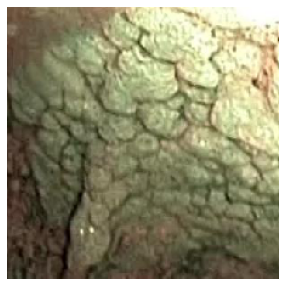

In [27]:
img_tf = tf.keras.preprocessing.image.load_img("/home/chusmoyano/tfg-gastro/data/NBI/adenoma/adenoma_1.jpg",
                                            target_size=(224, 224))
img = tf.keras.preprocessing.image.img_to_array(img_tf) 
#img /= 255.0
#img_uint8 = img*255
img = img.astype(np.uint8)

visualize(img)



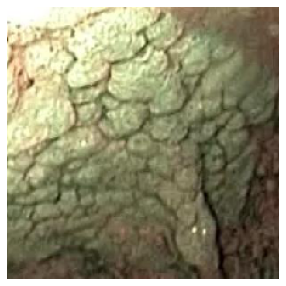

In [28]:
transform = A.HorizontalFlip(p=0.5)
random.seed(7)
augmented_image = transform(image=img)['image']
visualize(augmented_image)

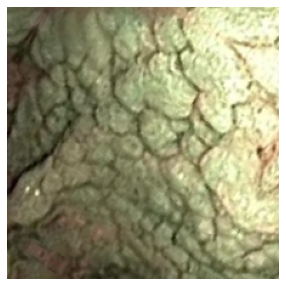

In [29]:
transform = A.ShiftScaleRotate(p=0.5)
random.seed(7) 
augmented_image = transform(image=img)['image']
visualize(augmented_image)

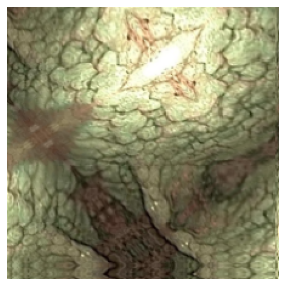

In [44]:
transform = A.Compose([
    A.CLAHE(),
    A.RandomRotate90(),
    A.Transpose(),
    A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.50, rotate_limit=45, p=.75),
    A.Blur(blur_limit=3),
    A.OpticalDistortion(),
    A.GridDistortion(),
    A.HueSaturationValue(),
    
])
random.seed(5) 
augmented_image = transform(image=img_uint8)['image']
visualize(augmented_image)

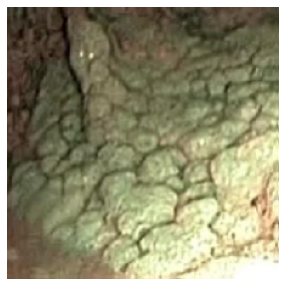

In [90]:
transform = A.Compose([
    #A.CLAHE(),
    A.RandomRotate90(),
    A.Transpose(),
    A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.3, rotate_limit=45, p=.65),
    A.Blur(blur_limit=4),
    A.OpticalDistortion(),
    A.GridDistortion(),
    A.HueSaturationValue(),
    A.RandomBrightnessContrast(p=0.5),
])
augmented_image = transform(image=img)['image']
visualize(augmented_image)

In [94]:
images = []
for i in range(100):
    augmented_image = transform(image=img)['image']
    images.append(augmented_image)
    

In [95]:
def plot_image_grid(images, ncols=None, cmap='gray'):
  '''Plot a grid of images'''
  if not ncols:
    factors = [i for i in range(1, len(images)+1) if len(images) % i == 0]
    ncols = factors[len(factors) // 2] if len(factors) else len(images) // 4 + 1
  nrows = int(len(images) / ncols) + int(len(images) % ncols)
  imgs = [images[i] if len(images) > i else None for i in range(nrows * ncols)]
  f, axes = plt.subplots(nrows, ncols, figsize=(3*ncols, 2*nrows))
  axes = axes.flatten()[:len(imgs)]
  for img, ax in zip(imgs, axes.flatten()): 
    if np.any(img):
      if len(img.shape) > 2 and img.shape[2] == 1:
        img = img.squeeze()
      ax.imshow(img, cmap=cmap)



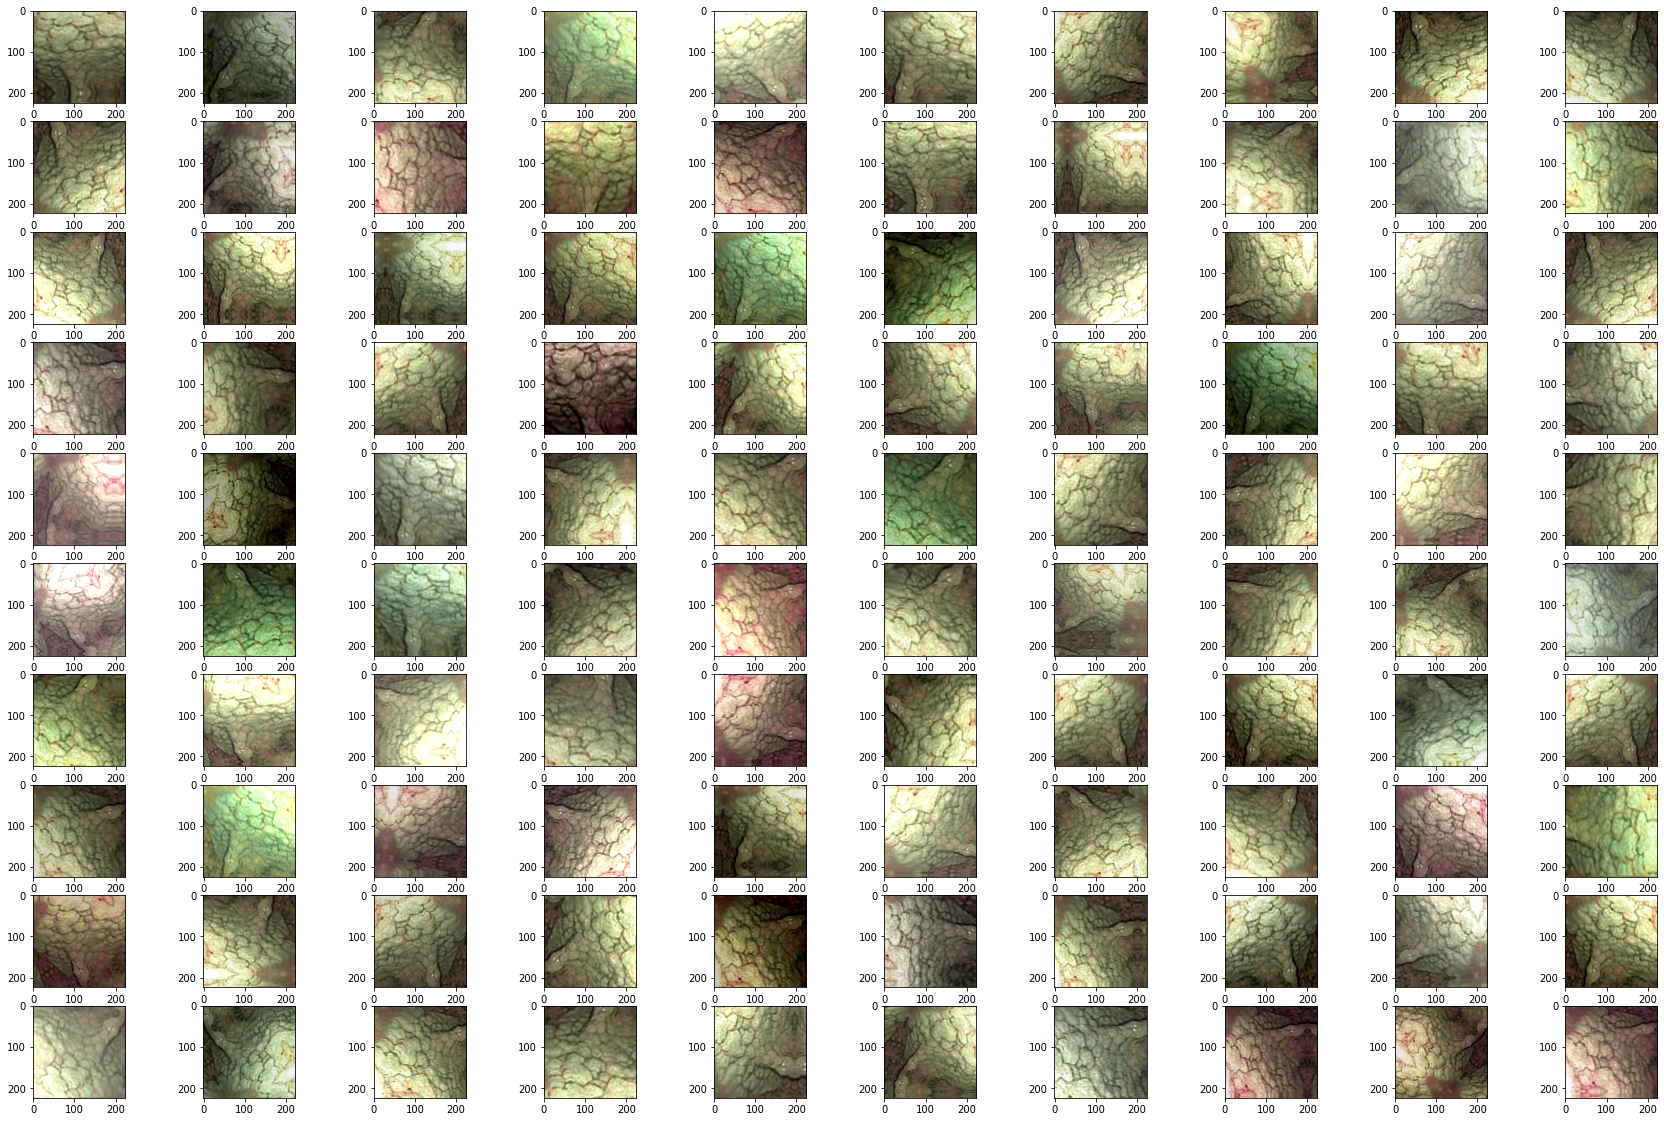

In [98]:
plot_image_grid(images)